In [1]:
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Cargar datos

# Leer el archivo csv desde el Google Drive
data = pd.read_csv('/content/gdrive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL/datasets/SolarPrediction.csv')


In [4]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [92]:
data.shape

(32686, 11)

In [206]:
X = data[['UNIXTime', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']]
y = data[['Radiation']]

m = y.size

In [165]:
X.shape

(32686, 6)

***Normalización de Características***

In [166]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [167]:
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

         UNIXTime  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0      1475229326           48     30.46        59                  177.39   
1      1475229023           48     30.46        58                  176.78   
2      1475228726           48     30.46        57                  158.75   
3      1475228421           48     30.46        60                  137.71   
4      1475228124           48     30.46        62                  104.95   
...           ...          ...       ...       ...                     ...   
32681  1480587604           44     30.43       102                  145.42   
32682  1480587301           44     30.42       102                  117.78   
32683  1480587001           44     30.42       102                  145.19   
32684  1480586702           44     30.42       101                  164.19   
32685  1480586402           44     30.43       101                   83.59   

       Speed  
0       5.62  
1       3.37  
2       3.37  
3  

***Datos graficados***

In [168]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

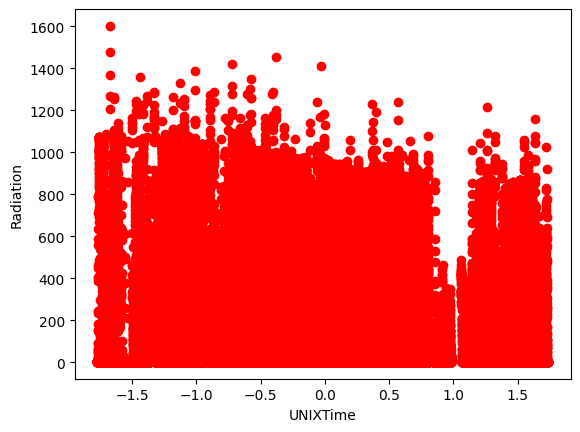

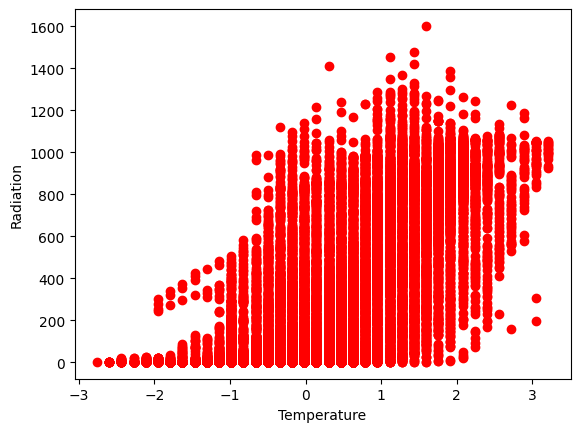

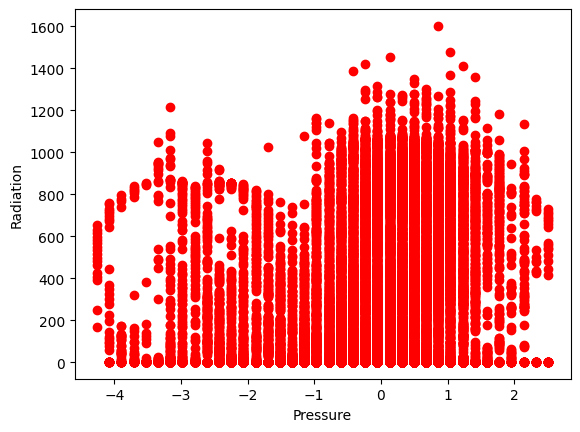

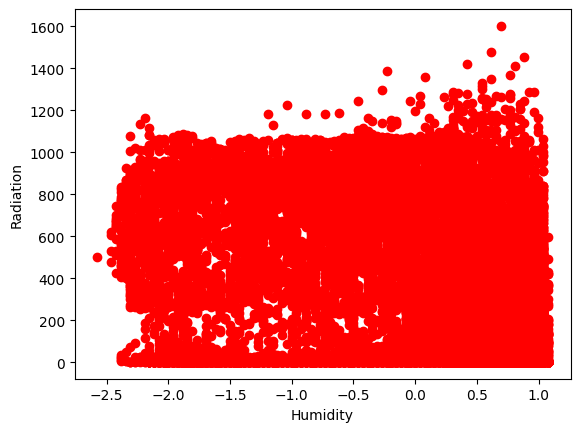

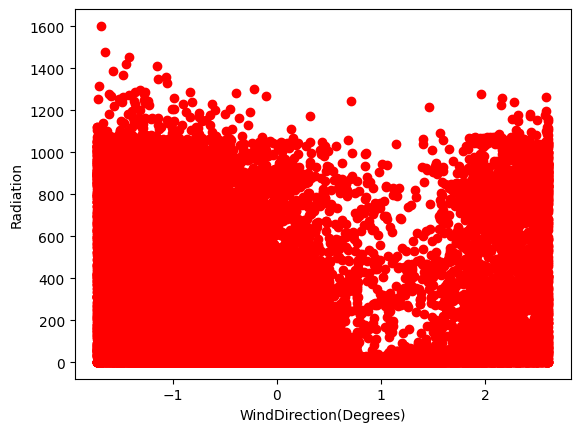

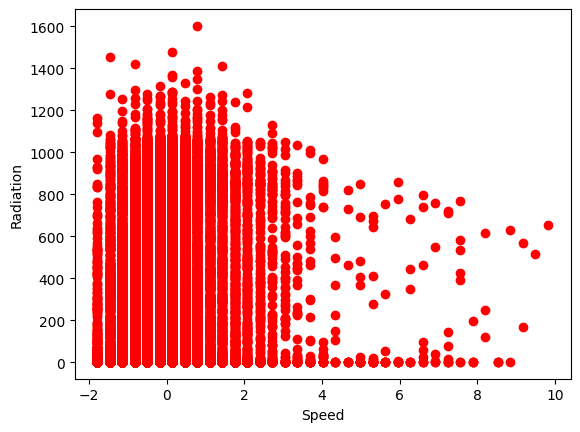

In [170]:
xlabel1 = "UNIXTime"
xlabel2 = "Temperature"
xlabel3 = "Pressure"
xlabel4 = "Humidity"
xlabel5 = "WindDirection(Degrees)"
xlabel6 = "Speed"
ylabel1 = "Radiation"
graficarDatos(X_norm['UNIXTime'], y, xlabel1, ylabel1)
graficarDatos(X_norm['Temperature'], y, xlabel2, ylabel1)
graficarDatos(X_norm['Pressure'], y, xlabel3, ylabel1)
graficarDatos(X_norm['Humidity'], y, xlabel4, ylabel1)
graficarDatos(X_norm['WindDirection(Degrees)'], y, xlabel5, ylabel1)
graficarDatos(X_norm['Speed'], y, xlabel6, ylabel1)

In [171]:

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [172]:
X_ready

array([[ 1.        , -0.93775298, -0.50043927, ..., -0.61625306,
         0.40761954, -0.17873758],
       [ 1.        , -0.93785381, -0.50043927, ..., -0.65472966,
         0.40028483, -0.82335911],
       [ 1.        , -0.93795264, -0.50043927, ..., -0.69320626,
         0.1834901 , -0.82335911],
       ...,
       [ 1.        ,  0.84517269, -1.14549002, ...,  1.03824083,
         0.02044315,  0.78962722],
       [ 1.        ,  0.84507319, -1.14549002, ...,  0.99976423,
         0.24890127,  0.46588396],
       [ 1.        ,  0.84497336, -1.14549002, ...,  0.99976423,
        -0.72024213, -0.82335911]])

In [203]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [204]:
theta = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

# Suponiendo que y es un DataFrame y quieres obtener la primera columna como array
y_array = y.iloc[:, 0].values

# Ahora puedes usar y_array en lugar de y
JJ = calcularCosto(X_ready, y_array, theta)


# Imprimir el resultado
print(f"Con theta: {theta} se obtiene una radiacion de: {JJ}")

Con theta: [0.1 0.2 0.3 0.4 0.5 0.6 0.7] se obtiene una radiacion de: 71313.66726565255


***Descenso Gradiente***

In [205]:
def descensoGradiente(X, y, theta, alpha, num_iteraciones):
    m = y.size
    J_historial = np.zeros(num_iteraciones)

    for iteracion in range(num_iteraciones):
        h = np.dot(X, theta)
        error = h - y
        gradiente = (1/m) * np.dot(X.T, error)
        theta -= alpha * gradiente

        J_historial[iteracion] = calcularCosto(X, y, theta)

    return theta, J_historial




Parámetros finales después del descenso del gradiente: [207.12469742  61.79551416 259.07320913 -24.61477277   5.26313581
 -22.1708348   21.34132807]


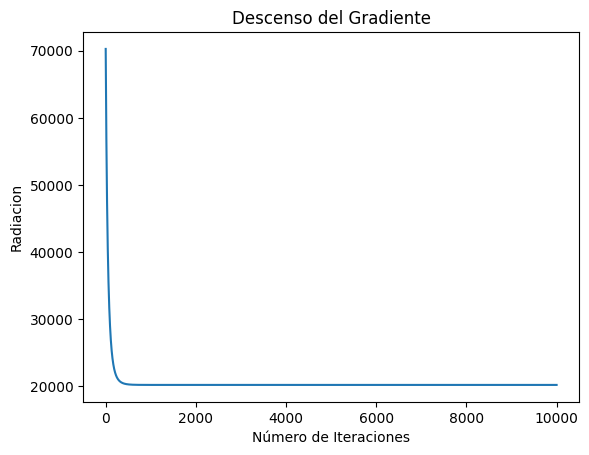

In [177]:
# Parámetros del descenso del gradiente
alpha = 0.01  # Tasa de aprendizaje
num_iteraciones = 10000

# Inicializar theta (puedes ajustar los valores según sea necesario)
theta = np.zeros(7)
# Realizar el descenso del gradiente
theta_final, historial_costo = descensoGradiente(X_ready, y_array, theta, alpha, num_iteraciones)

# Imprimir el resultado
print(f"Parámetros finales después del descenso del gradiente: {theta_final}")

# Graficar el historial de la función de costo
pyplot.plot(range(1, num_iteraciones + 1), historial_costo)
pyplot.title('Descenso del Gradiente')
pyplot.xlabel('Número de Iteraciones')
pyplot.ylabel('Radiacion')
pyplot.show()

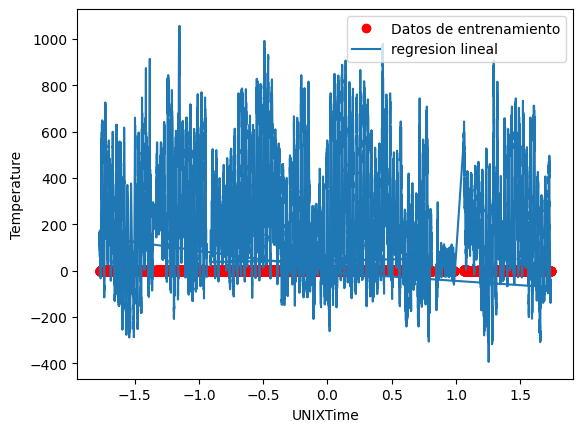

In [178]:
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)
pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [179]:
# 2300,4,449900
y_pred = np.dot([1, 2305, 4, 1, 2, 5, 3], theta)
print(y_pred)

143621.15899052564


***Ecuacion de la Normal***

In [180]:
def ecuacionNormal(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Calcular los parámetros utilizando la ecuación normal
theta_normal = ecuacionNormal(X_ready, y_array)

print(f"Parámetros finales utilizando la ecuación normal: {theta_normal}")


Parámetros finales utilizando la ecuación normal: [207.12469742  61.79551416 259.07320913 -24.61477277   5.26313581
 -22.1708348   21.34132807]


***10 Ejemplos***

In [188]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([134172, 1 , 50, 30.5, 59, 189, 5])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))


Radiacion predecida (usando la ecuación normal): 27798826.55


In [187]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([234122, 1 , 50, 30.5, 60, 180, 5])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 48501144.86


In [189]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([213234, 1 , 50, 30.5, 58, 54, 3])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 44177464.50


In [192]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([213234, 1 , 48, 30.5, 69, 54, 5])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 44177046.93


In [193]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([324123, 1 , 39, 30.5, 60, 58, 2])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 67142365.77


In [198]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([212434, 1.6 , 40, 30.5, 60, 58, 2])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 44009111.59


In [199]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([2312234, 1.8 , 39, 30.5, 57, 56, 2])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 478929333.07


In [200]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([3213432, 1.9 , 40, 30.5, 60, 55, 3])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 665590020.70


In [201]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([232134, 1 , 50, 30.5, 54, 61, 2])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 48091923.69


In [202]:
# Supongamos que X_ready tiene 7 características (incluyendo el término de sesgo)
theta_normal = ecuacionNormal(X_ready, y_array)

# Agrega 1 al inicio de X_array para el término de sesgo
X_array = np.array([2341234, 1.2 , 39, 29, 60, 58, 4])  # Completa con los valores de las otras características

# Asegúrate de que theta_normal tenga la misma longitud que X_array
if len(theta_normal) != len(X_array):
    raise ValueError("Las dimensiones de theta y X_array no coinciden")

prediccion = np.dot(X_array, theta_normal)

print('Radiacion predecida (usando la ecuación normal): {:.2f}'.format(prediccion))

Radiacion predecida (usando la ecuación normal): 484935963.28
